In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [11]:
X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [12]:

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

learning_rate = 0.01  # 学习率
# 线性回归函数
def linear_regression(x):
    return W*x + b

# 损失函数
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# 优化器采用随机梯度下降(SGD)
optimizer = tf.optimizers.SGD(learning_rate)

In [13]:
training_steps = 1000  # 训练次数
display_step = 50  # 训练50次输出一次

# 计算梯度，更新参数
def run_optimization():
    # tf.GradientTape()梯度带，可以查看每一次epoch的参数值
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # 计算梯度
    gradients = g.gradient(loss, [W, b])
    # 更新W，b
    optimizer.apply_gradients(zip(gradients, [W, b]))

# 开始训练
for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.182109, W: 0.435503, b: -0.504741
step: 100, loss: 0.170079, W: 0.424669, b: -0.427935
step: 150, loss: 0.159426, W: 0.414474, b: -0.355654
step: 200, loss: 0.149991, W: 0.404879, b: -0.287633
step: 250, loss: 0.141634, W: 0.395850, b: -0.223619
step: 300, loss: 0.134234, W: 0.387353, b: -0.163377
step: 350, loss: 0.127680, W: 0.379356, b: -0.106684
step: 400, loss: 0.121876, W: 0.371831, b: -0.053332
step: 450, loss: 0.116735, W: 0.364749, b: -0.003123
step: 500, loss: 0.112182, W: 0.358084, b: 0.044127
step: 550, loss: 0.108150, W: 0.351812, b: 0.088593
step: 600, loss: 0.104580, W: 0.345909, b: 0.130440
step: 650, loss: 0.101417, W: 0.340354, b: 0.169820
step: 700, loss: 0.098616, W: 0.335127, b: 0.206880
step: 750, loss: 0.096136, W: 0.330207, b: 0.241757
step: 800, loss: 0.093939, W: 0.325578, b: 0.274579
step: 850, loss: 0.091994, W: 0.321221, b: 0.305466
step: 900, loss: 0.090271, W: 0.317121, b: 0.334534
step: 950, loss: 0.088745, W: 0.313263, b: 0.361889
step

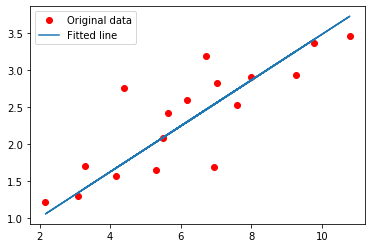

In [16]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, numpy.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()